### 4 Applied: Random Forest 

####  In this question, we use Random Forest model to predict loan default. Download the data loans.zip from Canvas. The zip file contains two files: loans train.csv and loans test.csv. They have the same format, where the last column is a binary default label (that we aim to predict) and other columns are observational features. The feature names are provided in the header.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Check for directory before load the data
os.getcwd()
os.chdir('/Users/michellehsu/Desktop/CMU/Spring 2018/95-828 ML for Problem Solving/HW/HW3/Data/loans')

In [3]:
#Read the file
loans_train = pd.read_csv("loans_train.csv")
loans_test = pd.read_csv("loans_test.csv")

In [4]:
#Data exploration with summary statistics
len(loans_train) #train: 13761 rows and 82 columns
len(loans_test) #test: 4587 rows and 82 columns
loans_train.describe()

,Unnamed: 0,listing_amount,amount_funded,listing_monthly_payment,dti_wprosper_loan,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_rate,...,all901,bac026,bac401,bac403,iln201,ref001,rep002,rev201,all084,default
count,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000,...,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000,13761.000000,1.376100e+04,13761.000000,13761.000000
mean,10656.360948,6621.831278,6621.831278,236.518779,128.800129,-0.182299,0.175626,0.168568,-0.007073,0.177722,...,80.135165,4.016859,10256.281302,55.720587,19898.683017,1.618487,2.414359,1.664349e+04,2.074486,0.355134
std,6109.594347,5765.429350,5765.429350,204.131821,1893.395771,0.189268,0.109999,0.072057,0.091256,0.072905,...,20.557030,3.095220,22437.727586,37.122572,26709.234935,2.248886,3.397346,4.049555e+04,3.760573,0.478571
min,3.000000,1000.000000,1000.000000,27.780000,0.000000,-0.760000,0.006000,-0.010000,-0.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,5366.000000,2550.000000,2550.000000,96.110000,0.140000,-0.289100,0.085000,0.115000,-0.055000,0.123500,...,68.000000,2.000000,243.000000,22.000000,2162.000000,0.000000,0.000000,1.259000e+03,0.000000,0.000000
50%,10718.000000,5000.000000,5000.000000,170.720000,0.210000,-0.150000,0.160000,0.154000,0.009900,0.163000,...,86.000000,3.000000,2212.000000,61.000000,12831.000000,1.000000,1.000000,5.449000e+03,0.000000,0.000000
75%,15875.000000,8900.000000,8900.000000,308.820000,0.320000,-0.038000,0.235000,0.210000,0.056000,0.220000,...,100.000000,6.000000,9944.000000,88.000000,26775.000000,3.000000,4.000000,1.593600e+04,3.000000,1.000000
max,21623.000000,25000.000000,25000.000000,1130.900000,72396.400000,0.220000,0.380000,0.340000,0.297700,0.350000,...,100.000000,30.000000,413072.000000,473.000000,729557.000000,48.000000,74.000000,1.435667e+06,83.000000,1.000000


#### 4.1. Fit a Decision Tree model using the training data. Let the tree grow until it is impossible to split (all records in data subset have the same output or the same set of input attributes). Use the model to predict labels for both training data and test data. Report training accuracy and test accuracy. <br>

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [6]:
dt = DecisionTreeClassifier()
dt.fit(loans_train.iloc[:,0:81], loans_train.iloc[:,-1])
dt_pred_no_cv = dt.predict(loans_test.iloc[:,0:81])

In [7]:
#Training accuracy
print('Training accuracy is', dt.score(loans_train.iloc[:,0:81], loans_train.iloc[:,-1]))
#Test accuracy
dt_cm_no_cv = confusion_matrix(loans_test.iloc[:,-1], dt_pred_no_cv)
print('Testing accuracy is', sum(dt_cm_no_cv.diagonal())/dt_cm_no_cv.sum())

Training accuracy is 1.0
Testing accuracy is 0.616742969261


#### 4.2. Now use grid search cross-validation to determine the maximum depth hyper-parameter. Search over integers from 2 to 10. Fit another Decision Tree model with the optimal maximum depth you find. Report training accuracy and test accuracy.

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
parameters = {'max_depth':range(2,11)}
gs = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs =3)
gs.fit(loans_train.iloc[:,0:81], loans_train.iloc[:,-1])
print(gs.best_params_) 

{'max_depth': 4}


In [14]:
dt_cv = DecisionTreeClassifier(max_depth = 4)
dt_cv.fit(loans_train.iloc[:,0:81], loans_train.iloc[:,-1])
dt_pred_cv = dt_cv.predict(loans_test.iloc[:,0:81])
#Training accuracy with max depth =4
print('Training accuracy with max depth = 4 is', dt_cv.score(loans_train.iloc[:,0:81], loans_train.iloc[:,-1]))
#Test accuracy with max depth =4
dt_cm_cv = confusion_matrix(loans_test.iloc[:,-1], dt_pred_cv)
print('Testing accuracy with max depth = 4 is', sum(dt_cm_cv.diagonal())/dt_cm_cv.sum())

Training accuracy with max depth = 4 is 0.696243005596
Testing accuracy with max depth = 4 is 0.689339437541


#### 4.3. Write a Random Forest model. Specifically, the model should consist of 100 base estimators (trees); randomly choose 20% attributes out of all attributes when building each tree; let each tree grow until it is impossible to split (do not prune). Do NOT use any standard Random Forest package, but you are free to use Decision Tree package. Fit the model on the training data. Report training accuracy and test accuracy. Print your codes for this part.

In [15]:
def random_forest(train, test):
    X_test = test.iloc[:,0:81]
    y_test = test.iloc[:,-1]
    train_result= []
    test_result= []
    for i in range(100):
        #Bootstrap training samples
        Z = train.iloc[np.random.randint(len(train), size=len(train))]
        X_train = Z.iloc[:,0:81]
        y_train = Z.iloc[:,-1]
        #Randomly choose 20% attributes
        X_subset = X_train.sample(int(81*0.2), axis=1)
        X_test_subset = X_test[X_subset.columns]
        #Build decision tree and make prediction
        rf = DecisionTreeClassifier()
        rf.fit(X_subset, y_train)
        #Use the original data with 20% attributes selected in the previous step to make predition
        train_pred = rf.predict(train[X_subset.columns])
        test_pred = rf.predict(X_test_subset)
        train_result.append(train_pred)
        test_result.append(test_pred)
    train_result = np.array(train_result)
    test_result = np.array(test_result)
    return train_result, test_result

In [30]:
#Run the random forest function to get the prediction 
train_result, test_result = random_forest(loans_train, loans_test)
#Calculate final result by majority vote
train_pred_mj = []
test_pred_mj = []
#Majority vote for training samples
for i in range(len(train_result.T)):
    counts = np.bincount(train_result[0:100,i])
    train_pred_mj.append(np.argmax(counts))
#Majority vote for test samples
for i in range(len(test_result.T)):
    counts = np.bincount(test_result[0:100,i])
    test_pred_mj.append(np.argmax(counts))

In [31]:
#Training accuracy of 100 decision trees
rf_cm_train = confusion_matrix(loans_train.iloc[:,-1], train_pred_mj)
print('Training accuracy of 100 decision trees is', sum(rf_cm_train.diagonal())/rf_cm_train.sum())
#Test accuracy of 100 decision trees
rf_cm_test = confusion_matrix(loans_test.iloc[:,-1], test_pred_mj)
print('Testing accuracy of 100 decision trees is', sum(rf_cm_test.diagonal())/rf_cm_test.sum())

Training accuracy of 100 decision trees is 1.0
Testing accuracy of 100 decision trees is 0.696751689557


```Python
def random_forest(train, test):
    X_test = test.iloc[:,0:81]
    y_test = test.iloc[:,-1]
    train_result= []
    test_result= []
    for i in range(100):
        #Bootstrap training samples
        Z = train.iloc[np.random.randint(len(train), size=len(train))]
        X_train = Z.iloc[:,0:81]
        y_train = Z.iloc[:,-1]
        #Randomly choose 20% attributes
        X_subset = X_train.sample(int(81*0.2), axis=1)
        X_test_subset = X_test[X_subset.columns]
        #Build decision tree and make prediction
        rf = DecisionTreeClassifier()
        rf.fit(X_subset, y_train)
        #Use the original data with 20% attributes selected in the previous step to make predition
        train_pred = rf.predict(train[X_subset.columns])
        test_pred = rf.predict(X_test_subset)
        train_result.append(train_pred)
        test_result.append(test_pred)
    train_result = np.array(train_result)
    test_result = np.array(test_result)
    return train_result, test_result
```

```Python
#Run the ranfom forest function to get the prediction 
train_result, test_result = random_forest(loans_train, loans_test)
#Calculate final result by majority vote
train_pred_mj = []
test_pred_mj = []
#Majority vote for training samples
for i in range(len(train_result.T)):
    counts = np.bincount(train_result[0:100,i])
    train_pred_mj.append(np.argmax(counts))
#Majority vote for test samples
for i in range(len(test_result.T)):
    counts = np.bincount(test_result[0:100,i])
    test_pred_mj.append(np.argmax(counts))
```

```Python
#Training accuracy of 100 decision trees
rf_cm_train = confusion_matrix(loans_train.iloc[:,-1], train_pred_mj)
print('Training accuracy of 100 decision trees is', sum(rf_cm_train.diagonal())/rf_cm_train.sum())
#Test accuracy of 100 decision trees
rf_cm_test = confusion_matrix(loans_test.iloc[:,-1], test_pred_mj)
print('Testing accuracy of 100 decision trees is', sum(rf_cm_test.diagonal())/rf_cm_test.sum())
```

#### 4.4. Again, find the optimal maximum depth (search through 2 to 10) for the random forest model using grid search cross-validation. What is the optimal maximum depth? How does it compare to the optimal maximum depth in Decision Tree? Fit another Random Forest model with the optimal maximum depth. Report training accuracy and test accuracy.

In [22]:
parameters = {'max_depth':range(2,11)}
gs_rf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs =-1)
X_test = loans_test.iloc[:,0:81]
y_test = loans_test.iloc[:,-1]
for i in range(100):
    #Bootstrap training samples
    Z = loans_train.iloc[np.random.randint(len(loans_train), size=len(loans_train))]
    X_train = Z.iloc[:,0:81]
    y_train = Z.iloc[:,-1]
    #Randomly choose 20% attributes
    X_subset = X_train.sample(int(81*0.2), axis=1)
    X_test_subset = X_test[X_subset.columns]
    #Build decision tree with grid search for optimal maximum depth
    gs_rf.fit(X_subset, y_train)
print(gs_rf.best_params_) 

{'max_depth': 10}


In [23]:
#Construct new random forest function with optimal depth of 10
def random_forest_depth_10(train, test):
    X_test = test.iloc[:,0:81]
    y_test = test.iloc[:,-1]
    train_result= []
    test_result= []
    for i in range(100):
        #Bootstrap training samples
        Z = train.iloc[np.random.randint(len(train), size=len(train))]
        X_train = Z.iloc[:,0:81]
        y_train = Z.iloc[:,-1]
        #Randomly choose 20% attributes
        X_subset = X_train.sample(int(81*0.2), axis=1)
        X_test_subset = X_test[X_subset.columns]
        #Build decision tree and make prediction
        rf = DecisionTreeClassifier(max_depth = 10)
        rf.fit(X_subset, y_train)
        #Use the original data with 20% attributes selected in the previous step to make predition
        train_pred = rf.predict(train[X_subset.columns])
        test_pred = rf.predict(X_test_subset)
        train_result.append(train_pred)
        test_result.append(test_pred)
    train_result = np.array(train_result)
    test_result = np.array(test_result)
    return train_result, test_result

In [26]:
train_result_gs, test_result_gs = random_forest_depth_10(loans_train, loans_test)
train_pred_mj_gs = []
test_pred_mj_gs = []
#Majority vote for training samples
for i in range(len(train_result_gs.T)):
    counts = np.bincount(train_result_gs[0:100,i])
    train_pred_mj_gs.append(np.argmax(counts))
#Majority vote for test samples
for i in range(len(test_result_gs.T)):
    counts = np.bincount(test_result_gs[0:100,i])
    test_pred_mj_gs.append(np.argmax(counts))

In [27]:
#Training accuracy of 100 decision trees of depth = 10
rf_cm_train_gs = confusion_matrix(loans_train.iloc[:,-1], train_pred_mj_gs)
print('Training accuracy of 100 decision trees of depth 10 is', sum(rf_cm_train_gs.diagonal())/rf_cm_train_gs.sum())
#Test accuracy of 100 decision trees of depth = 10
rf_cm_test_gs = confusion_matrix(y_test, test_pred_mj_gs)
print('Testing accuracy of 100 decision trees of depth 10 is', sum(rf_cm_test_gs.diagonal())/rf_cm_test_gs.sum())

Training accuracy of 100 decision trees of depth 10 is 0.778722476564
Testing accuracy of 100 decision trees of depth 10 is 0.701983867451


#### 4.5.Does the Random Forest model outperform the Decision Tree model? Explain why from the perspective of bias-variance trade-off.

In terms of the accuracy, random forest model outperformed the decision tree model. In the random forest model, the algorithm fed on fewer instances due to bootstrap sampling. Since each individual tree fully grown in the random forest model, the bias is low and the variance is high. By adopting majority vote method, we can reduce variance to certain degree. On the other hand, the decision tree model only used 1 tree with more data points. Hence, the bias will be higher than random forest model.

#### 4.6. What is the main difference between Random Forest and Bagging Tree? When does Random Forest perform better?

The main difference between random forest and bagging tree is the number of features used. In random forest, each individual tree is constructed using only a randomly chosen subset of features, whereas bagging tree is built using all of the features. Random forest outperforms the bagging tree whene there are correlated predictors. Random forest reduces the correlation between weak learners by randomly selecting features to split on so that the variance can decrease.

----------

### 5 Kernel Regression and LWR

#### In this question, we implement Kernel Regression and Locally-Weighted Regression from scratch. Do NOT use any existing kernel regression or linear regression packages. You are free to use standard packages for probability distribution and linear algebra.

#### 5.1. Load the data. Shuffle the data and split it into 75% training data and 25% test data.

In [32]:
#Check for directory before load the data
os.getcwd()
os.chdir('/Users/michellehsu/Desktop/CMU/Spring 2018/95-828 ML for Problem Solving/HW/HW3/Data')

In [34]:
#Read the file
kernel_data = pd.read_csv("kernel_reg_data.csv")
#Shuffle the data
kernel_data = kernel_data.iloc[np.random.permutation(len(kernel_data))]
#Split the data into 75% training data and 25% test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kernel_data['x'], kernel_data['y'], test_size=0.25)

#### 5.2. Here we use a Gaussian kernel in Nadaraya-Watson Kernel Estimator. First, write a function to calculate weights. The function takes (at least) two parameters: target feature(i.e. X0) and kernel width h. It returns a vector of weights (wi, i = 1, ...n) defined above. Print your codes for this part.

In [35]:
import math

In [36]:
def Gaussian_weight(target, width):
    weight = []
    sum_k = 0
    for i in X_train:
        x = (target - i)/width
        k = (1/math.sqrt(math.pi))*math.e**(-(x**2)/2)
        sum_k += k
        weight.append(k)
    weight = weight/sum_k
    return weight

```Python
def Gaussian_weight(target, width):
    weight = []
    sum_k = 0
    for i in X_train:
        x = (targer - i)/width
        k = (1/math.sqrt(math.pi))*math.e**(-(x**2)/2)
        sum_k += k
        weight.append(k)
    weight = weight/sum_k
    return weight
```

#### 5.3. Next, predict y in the test data using Nadaraya-Watson Kernel Estimator (fitted with the training data) with h = 1. Report Mean Absolute Error of your predictions. Print your codes for this part.

In [40]:
pred_f = []
y_train_reset = y_train.reset_index()
for i in X_test.index: 
    f = 0
    w = Gaussian_weight(X_test[i],1)
    for j in range(len(y_train)):
        f += w[j]*y_train_reset.iloc[j]['y']
    pred_f.append((i,f))

In [41]:
d = dict(pred_f)
diff = []
for i in y_test.index:
    diff.append(abs(d[i]-y_test[i]))

```Python
pred_f = []
y_train_reset = y_train.reset_index()
for i in X_test.index: 
    f = 0
    w = Gaussian_weight(X_test[i],1)
    for j in range(len(y_train)):
        f += w[j]*y_train_reset.iloc[j]['y']
    pred_f.append((i,f))
    
d = dict(pred_f)
diff = []
for i in y_test.index:
    diff.append(abs(d[i]-y_test[i]))

print('The mean absolute error is', sum(diff)/len(y_test))
```

In [42]:
print('The mean absolute error is',sum(diff)/len(y_test))

The mean absolute error is 85.0761980325


#### 5.4. We then move to Locally-Weighted Regression. For each target point X0, we fit a weighted least squares regression using weights calculated by the function in 2), and the estimate is the fitted value at X0. Write a function that takes (at least) two(2) parameters: target features(i.e. X0) and kernel width h, and returns the LWR estimate. Predict y in the test data using your LWR function (fitted with the training data) with h = 1. Report Mean Absolute Error of your predictions. Do NOT use any linear regression or WLS packages. Use the above closed form solution for WLS. Print your codes for this part.

In [43]:
def LWR(target, width):
    weight = Gaussian_weight(target, width)
    diag_weight = np.diag(weight)
    X_array = np.c_[np.ones(750), np.array(X_train)]
    y_array = np.array(y_train)
    temp = np.dot(X_array.T, diag_weight).dot(X_array)
    beta = np.dot(np.linalg.inv(temp), X_array.T).dot(diag_weight).dot(y_array)
    pred = beta[0]+target*beta[1]
    return pred

In [44]:
LWR_pred = []
for i in X_test.index: 
    pred = LWR(X_test[i],1)
    LWR_pred.append((i,pred))

In [45]:
d_LWR = dict(LWR_pred)
diff_LWR = []
for i in y_test.index:
    diff_LWR.append(abs(d_LWR[i]-y_test[i]))

```Python
def LWR(target, width):
    weight = Gaussian_weight(target, width)
    diag_weight = np.diag(weight)
    X_array = np.c_[np.ones(750), np.array(X_train)]
    y_array = np.array(y_train)
    temp = np.dot(X_array.T, diag_weight).dot(X_array)
    beta = np.dot(np.linalg.inv(temp), X_array.T).dot(diag_weight).dot(y_array)
    pred = beta[0]+target*beta[1]
    return pred
```

```Python
LWR_pred = []
for i in X_test.index: 
    pred = LWR(X_test[i],1)
    LWR_pred.append((i,pred))
```

```Python
d_LWR = dict(LWR_pred)
diff_LWR = []
for i in y_test.index:
    diff_LWR.append(abs(d_LWR[i]-y_test[i]))
```

In [46]:
print('The mean absolute error of LWR is',sum(diff_LWR)/len(y_test))

The mean absolute error of LWR is 82.9962246663


```Python
print('The mean absolute error of LWR is',sum(diff_LWR)/len(y_test))
```

#### 5.5. Plot of your prediction in 4) with the true data points. (The x-axis is x, the y-axis is y, and use different colors for predicted points and true points.)

In [47]:
LWR_Series = list(zip(*LWR_pred))
predicted = pd.Series(LWR_Series[1], index = LWR_Series[0])

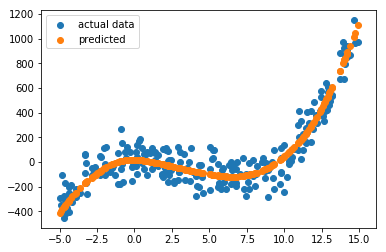

In [48]:
plt.scatter(X_test, y_test, label = "actual data")
plt.scatter(X_test, predicted, label = "predicted")
plt.legend()
plt.show()

#### 5.6. Predict y in the test data using your LWR function (fitted with the training data) with h = 10. Report Mean Absolute Error of your predictions, and plot your prediction with the true data points.

In [49]:
LWR_pred_10 = []
for i in X_test.index: 
    pred = LWR(X_test[i],10)
    LWR_pred_10.append((i,pred))
#Calculate the Mean absolute Error with width of 10
d_LWR_10 = dict(LWR_pred_10)
diff_LWR_10 = []
for i in y_test.index:
    diff_LWR_10.append(abs(d_LWR_10[i]-y_test[i]))
print('The mean absolute error of LWR with width of 10 is',sum(diff_LWR_10)/len(y_test))

The mean absolute error of LWR with width of 10 is 161.690131765


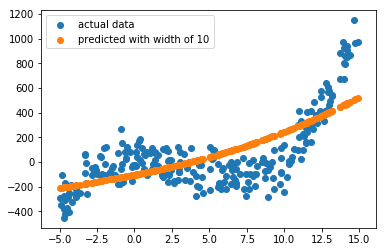

In [50]:
LWR_Series_10 = list(zip(*LWR_pred_10))
predicted_10 = pd.Series(LWR_Series_10[1], index = LWR_Series_10[0])
plt.scatter(X_test, y_test, label = "actual data")
plt.scatter(X_test, predicted_10, label = "predicted with width of 10")
plt.legend()
plt.show()

#### 5.7. Predict y in the test data using your LWR function (fitted with the training data) with h = 0.1. Report Mean Absolute Error of your predictions, and plot your prediction with the true data points.

In [51]:
LWR_pred_0 = []
for i in X_test.index: 
    pred = LWR(X_test[i],0.1)
    LWR_pred_0.append((i,pred))
#Calculate the Mean absolute Error with width of 0.1
d_LWR_0 = dict(LWR_pred_0)
diff_LWR_0 = []
for i in y_test.index:
    diff_LWR_0.append(abs(d_LWR_0[i]-y_test[i]))
print('The mean absolute error of LWR with width of 0.1 is',sum(diff_LWR_0)/len(y_test))

The mean absolute error of LWR with width of 0.1 is 84.4888028219


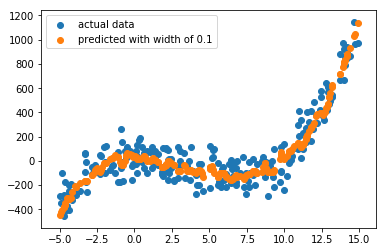

In [52]:
LWR_Series_0 = list(zip(*LWR_pred_0))
predicted_0 = pd.Series(LWR_Series_0[1], index = LWR_Series_0[0])
plt.scatter(X_test, y_test, label = "actual data")
plt.scatter(X_test, predicted_0, label = "predicted with width of 0.1")
plt.legend()
plt.show()

#### 5.8. What can you conclude about kernel width from the above exercises?

From the above analysis, a kernel width that is too big (i.e, 10) or too small (i.e, 0.1) won't do a good job on capturing the trend of the underlying data. A large kernel width will include points that are not close to the target and use them to calculate the local linear regression, which is fitting the noise. A small kernel width will exclude some near, but not near enough, points that represent the trend of the data. Therefore, the local linear regression will only rely on very near points, which might harm the prediction power.